In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./loan_data.csv")

---
# 컬럼 번역

In [ ]:
# credit.policy 
# if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
# -> 신용 기준, 고객이 LendingClub.com의 신용 인수 기준을 충족하는 경우, 그렇지 않은 경우 0.

# purpose 
# The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
# ->대출 목적 ('신용카드', '통합 채무 관리', '교육', '큰 규모의 지출', '소규모 개인 사업', '그 외')

# int.rate
# The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
# -> 대출 금리, LendingClub.com의 자체 결정으로 정해짐

# installment
# The monthly installments owed by the borrower if the loan is funded.
# -> 대출 자금이 지원되는 경우 대출자가 매달 갚아야 하는 할부금

# log.annual.inc
# The natural log of the self-reported annual income of the borrower.
# -> 대출자의 자진 신고 연소득의 로그

# dti
# The debt-to-income ratio of the borrower (amount of debt divided by annual income).
# -> 대출자의 총부채상환비율(채무금액을 연소득으로 나눈 값)

# fico
# The FICO credit score of the borrower.
# -> 대출자의 FICO 신용 점수

# days.with.cr.line
# The number of days the borrower has had a credit line.
# -> 대출자가 한도 대출을 사용한 날짜 수

# revol.bal
# The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
# -> 대출자 대출 지불 잔액(신용카드 청구주기 종료 시 미지급된 금액) 

# revol.util
# The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
# -> 대출자의 사용 가능한 총 크레딧 대비 사용된 크레딧 라인의 양)

# inq.last.6mths
# The borrower's number of inquiries by creditors in the last 6 months.
# -> 최근 6개월 동안의 대출자 신용 조회

# delinq.2yrs
# The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
# -> 대출자가 지난 2년 동안 지불 기한이 30일 이상 지난 횟수

# pub.rec
# The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
# -> 차용인의 공적기록말소(파산신고, 선취특권 또는 판결)의 수

# not.fully.paid
# Whether the borrower will be fully paid or not.
# -> 대출 신청인에게 신청액이 전액 지급될 지 여부


---
# plot

<AxesSubplot: xlabel='purpose', ylabel='count'>

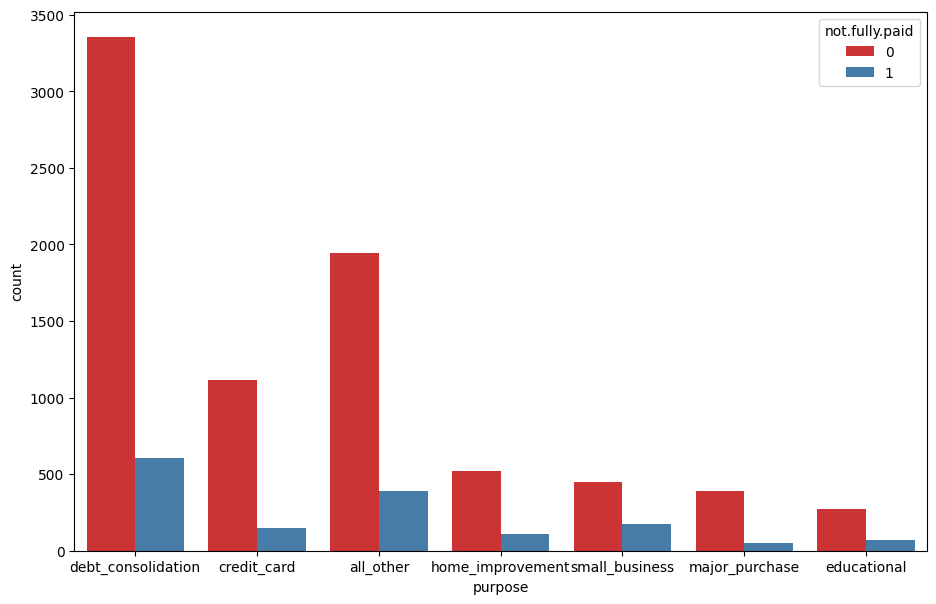

In [8]:
# not fully paid visualization based on purpose
# 대출 목적 별 대출 신청건 전액 지급 여부
# 비율을 보았을 때 소규모 사업의 위험도가 높아보임 

import seaborn as sns

plt.figure(figsize=(11,7))
sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette='Set1')

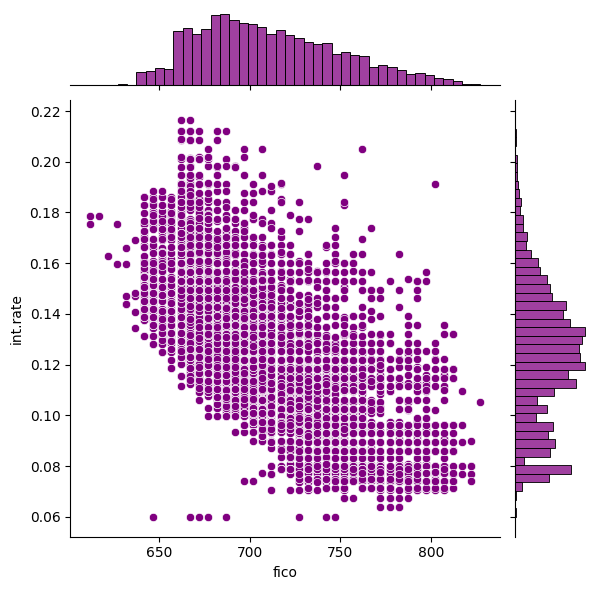

In [7]:
# 대출 금리와 fico점수의 역의 상관관계 
# A FICO score is a credit score created by the Fair Isaac Corporation (FICO). Fair Isaac Corporation에 의해 만들어진 신용점수
# fico 점수가 높을수록 위험이 낮기 때문에 대출 금리가 낮음

sns.jointplot(x='fico', y='int.rate', data=df, color='purple')

C:\Users\juno\AppData\Local\Temp\ipykernel_58916\3070796154.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["not.fully.paid"] == 0]['int.rate'], color = 'r',label='Personal Loan=0')
C:\Users\juno\AppData\Local\Temp\ipykernel_58916\3070796154.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

Text(0.5, 1.0, 'int.rate Distribution')

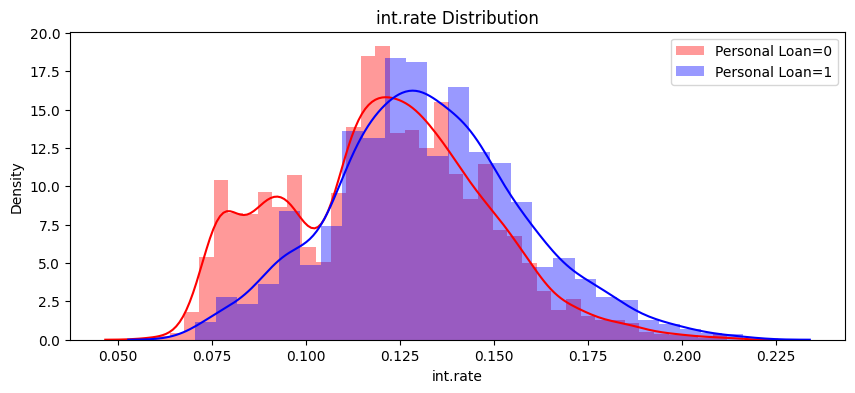

In [10]:
# 개인간 대출을 한 사람과 안한 사람들 간 대출 금리 차이


plt.figure(figsize=(10,4))
sns.distplot(df[df["not.fully.paid"] == 0]['int.rate'], color = 'r',label='Personal Loan=0')
sns.distplot(df[df["not.fully.paid"] == 1]['int.rate'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("int.rate Distribution")

Text(0.5, 0, 'FICO')

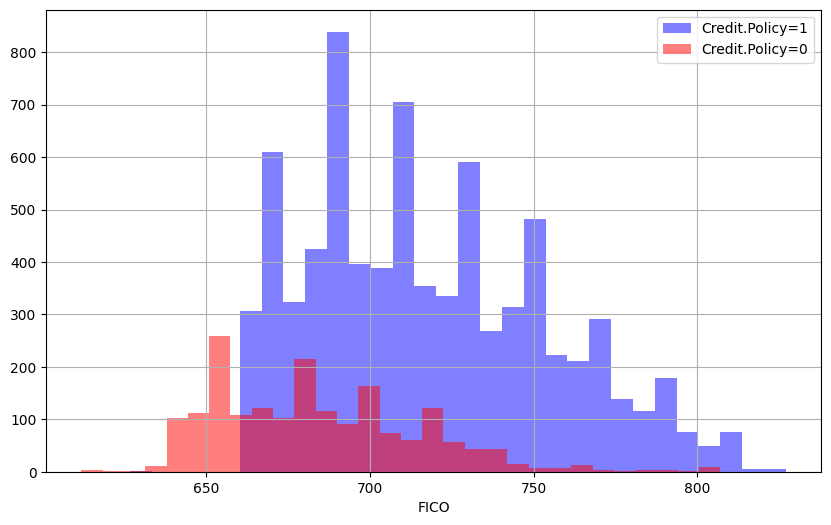

In [12]:
# fico점수와 대출 신청에 대한 전액 지금 여부 상관성 
# fico 점수가 높을수록 대출 신청에 대한 전액 지불여부가 높아짐  

plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

C:\Users\juno\AppData\Local\Temp\ipykernel_58916\4130576674.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["not.fully.paid"] == 0]['fico'], color = 'r',label='fico=0')
C:\Users\juno\AppData\Local\Temp\ipykernel_58916\4130576674.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df

Text(0.5, 1.0, 'not fully paid and fico')

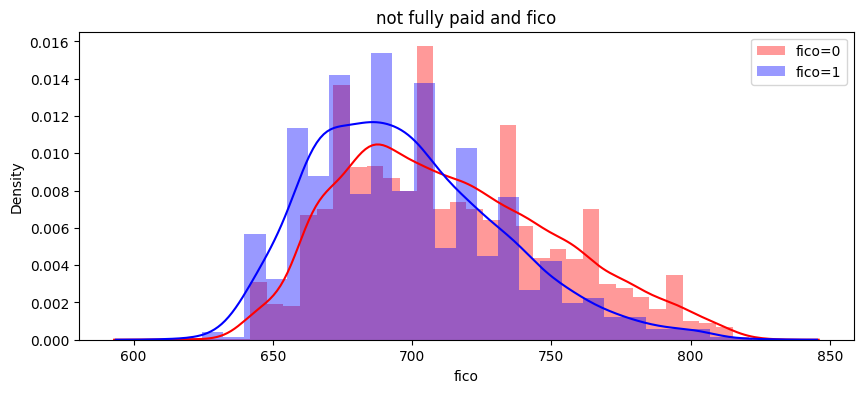

In [13]:
# 

plt.figure(figsize=(10,4))
sns.distplot(df[df["not.fully.paid"] == 0]['fico'], color = 'r',label='fico=0')
sns.distplot(df[df["not.fully.paid"] == 1]['fico'], color = 'b',label='fico=1')
plt.legend()
plt.title("not fully paid and fico")

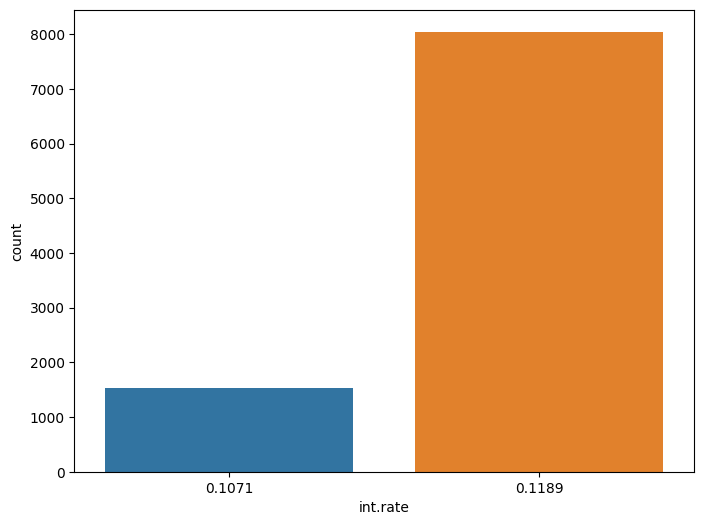

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x=df["not.fully.paid"], data= df["int.rate"])
plt.show()


In [14]:
df["fico"].corr(df["credit.policy"])

0.34831868311913927